In [3]:
!pip install sweetviz

In [4]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!pip install jupyter-contrib-nbextensions

In [5]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sv

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [6]:
df = pd.read_excel(r"C:\Users\gharb\OneDrive\Desktop\Datasets\Riyadh\Riyadh_Aqqar.xlsx")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1594 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      1594 non-null   object 
 1   الغرض           1594 non-null   object 
 2   المدينة         1591 non-null   object 
 3   الحي            1594 non-null   object 
 4   الواجهة         1594 non-null   object 
 5   المساحة         1594 non-null   int64  
 6   سعر المتر       1594 non-null   float64
 7   السعر الإجمالي  1594 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 112.1+ KB


In [45]:
df.describe()

,المساحة,سعر المتر,السعر الإجمالي
count,1594.000000,1594.000000,1.594000e+03
mean,641.670640,2603.231291,1.586830e+06
std,325.617395,1680.721596,1.224362e+06
min,1.000000,235.000000,1.400000e+03
25%,400.000000,1280.000000,6.763005e+05
50%,550.000000,2300.000000,1.193175e+06
75%,810.000000,3500.000000,2.192188e+06
max,2000.000000,7500.000000,6.000000e+06


In [47]:
df.shape

(1594, 8)

In [49]:
df.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.

In [9]:
df[df.duplicated()]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
13,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
19,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3200.0,3484800
34,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية,300,1950.0,585000
44,أرض,سكني,الرياض,حي الخليج,شمالية,300,2600.0,780000
50,أرض,سكني,الرياض,حي الحمراء,جنوبية,1000,6000.0,6000000
...,...,...,...,...,...,...,...,...
2063,أرض,سكني,الرياض,الرياض,شرقية,2450,2400.0,5880000
2096,أرض,سكني,الرياض,حي الروضة,جنوبية,627,4200.0,2633400
2116,أرض,سكني,الرياض,حي العارض,ثلاث شوارع,5450,4600.0,25070000
2125,أرض,تجاري,الرياض,حي المهدية,جنوبية,900,7600.0,6840000


In [10]:
df.drop_duplicates(inplace = True)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [11]:
df.isnull().sum()

نوع العقار         0
الغرض             47
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [16]:
count_result = (df == ' ').sum()
count_result 

نوع العقار         0
الغرض              0
المدينة            3
الحي              12
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [18]:
df.dtypes

نوع العقار         object
الغرض              object
المدينة            object
الحي               object
الواجهة            object
المساحة             int64
سعر المتر         float64
السعر الإجمالي      int64
dtype: object

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

## Outlier 

In [185]:
advert_report = sv.analyze(df)
advert_report.show_html('Advertising.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1571 (\N{ARABIC LETTER ALEF WITH HAMZA ABOVE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Matplotlib currently does not support Arabic natively.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1585 (\N{ARABIC LETTER REH}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1590 (\N{ARABIC LETTER DAD}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1571 (\N{ARABIC LETTER ALEF WITH HAMZA ABOVE}) missing from current font.
  figure.savefig(as

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1606 (\N{ARABIC LETTER NOON}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Matplotlib currently does not support Arabic natively.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1608 (\N{ARABIC LETTER WAW}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1593 (\N{ARABIC LETTER AIN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transpar

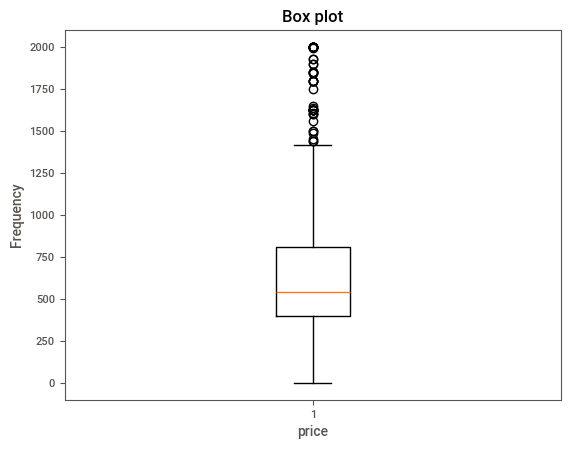

In [173]:
plt.boxplot(df['المساحة'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title(f'Box plot')
plt.show()

In [27]:
# df = df[df['المساحة'] <= 100000]
# df = df[df['المساحة'] <= 20000]
# df = df[df['المساحة'] <= 10000]
# df = df[df['المساحة'] <= 6000]
df = df[df['المساحة'] <= 2000]

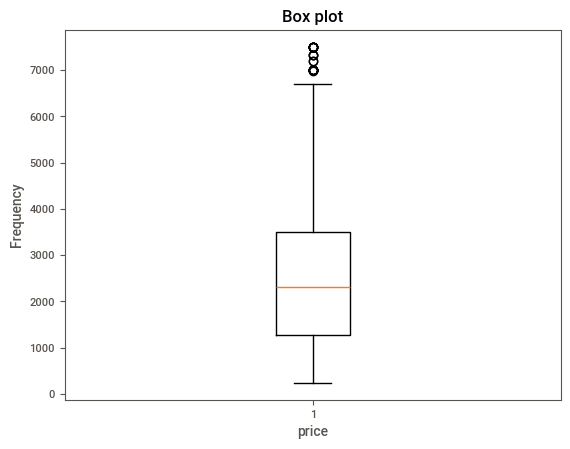

In [183]:
plt.boxplot(df['سعر المتر'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title(f'Box plot')
plt.show()

In [29]:
# df = df[df['سعر المتر'] <= 30000]
df = df[df['سعر المتر'] <= 7600]

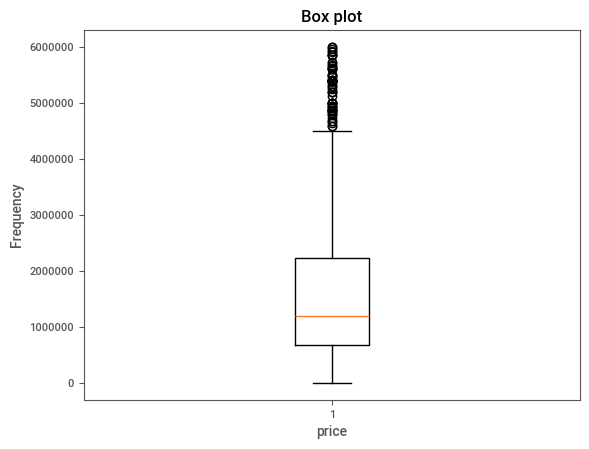

In [177]:
plt.boxplot(df['السعر الإجمالي'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title(f'Box plot')
plt.show()

In [31]:
df = df[df['السعر الإجمالي'] <= 6000000]

### Correcting errors

-------------------

In [17]:
df['المدينة'] = df['المدينة'].str.replace(" ", '')
df['الحي'] = df['الحي'].str.replace(" ", '')

In [13]:
df.fillna('غير معروف',inplace = True)

## 3,4. Univariate and Bivariate/Multivariate Analysis


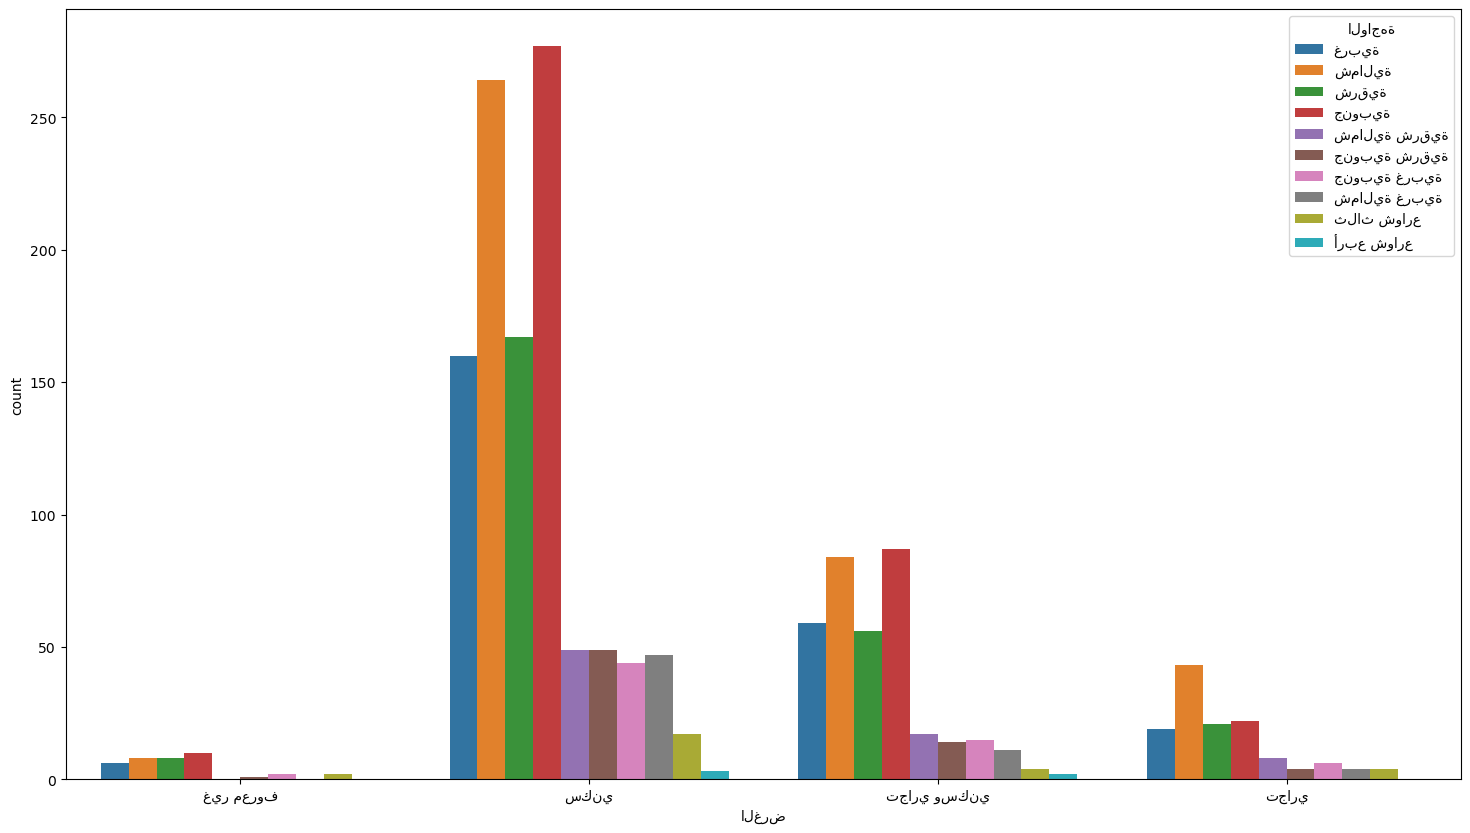

In [33]:
plt.figure(figsize=(18,10))
sns.countplot(x = 'الغرض', hue = 'الواجهة', data = df);

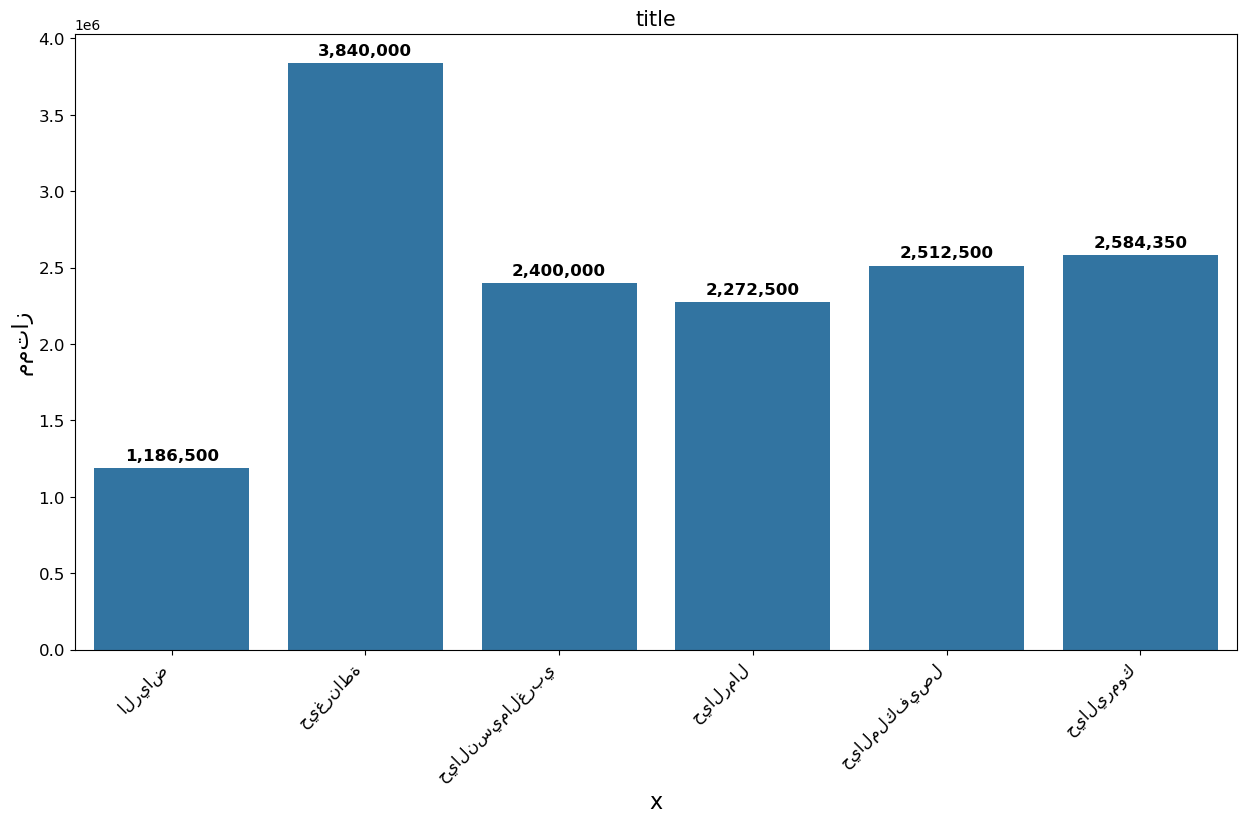

In [37]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df['الحي'].head(10), y='السعر الإجمالي', data=df, errorbar=('ci', 0.0))

plt.title('title', fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('ممتاز', fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points', fontsize=12, color='black', weight='bold')

plt.show()

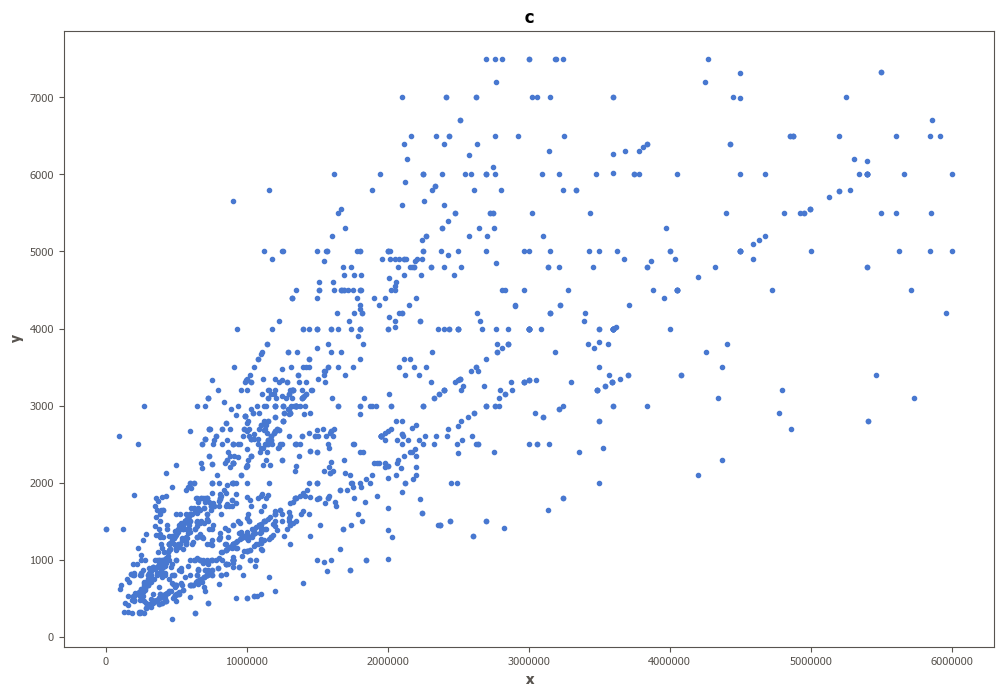

In [246]:
plt.figure(figsize=(12, 8))

plt.scatter(x='السعر الإجمالي', y='سعر المتر' , data = df)

plt.xlabel('x')
plt.ylabel('y')
plt.title('c')

plt.show()